# Extra

Usaremos los datos tick a tick del IVE (S&P 500 Value Index) que os descargasteis de Drive.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Carga el dataset, explóralo y da estructura correspondiente a los datos. El nombre de las columnas es el siguiente

**['date', 'time', 'price', 'bid', 'ask', 'volume']**

In [ ]:
data_ive = pd.read_csv("IVE_tickbidask.txt", sep=',', names=['date', 'time', 'price', 'bid', 'ask', 'volume'])

In [ ]:
data_ive_peq = pd.read_csv("IVE_tickbidask.txt", sep=',', names=['date', 'time', 'price', 'bid', 'ask', 'volume'], nrows=10000)

In [ ]:
data_ive.head(3)

In [ ]:
data_ive.dtypes

In [49]:
#Para poner la fecha en formato date
from datetime import datetime
from datetime import timedelta

In [53]:
data_ive.index = (data_ive.date +' '+ data_ive.time)
data_ive.head(3)

,date,time,price,bid,ask,volume
09/28/2009 09:30:00,09/28/2009,09:30:00,50.79,50.70,50.79,100
09/28/2009 09:30:00,09/28/2009,09:30:00,50.71,50.70,50.79,638
09/28/2009 09:31:32,09/28/2009,09:31:32,50.75,50.75,50.76,100


In [56]:
data_ive.index = pd.to_datetime(data_ive.index, format="%m/%d/%Y %H:%M:%S")

In [57]:
data_ive.head(3)

,date,time,price,bid,ask,volume
2009-09-28 09:30:00,09/28/2009,09:30:00,50.79,50.70,50.79,100
2009-09-28 09:30:00,09/28/2009,09:30:00,50.71,50.70,50.79,638
2009-09-28 09:31:32,09/28/2009,09:31:32,50.75,50.75,50.76,100


In [ ]:
data_ive.drop(columns=['date', 'time'] #Falta algoooo

In [58]:
print(data_ive.shape)
print(data_ive_peq.shape)

(6860940, 6)
(10000, 6)


- Estudia estadísticas básicas para detectar outliers

In [62]:
data_ive[data_ive['price'] < 52]

,date,time,price,bid,ask,volume
2009-09-28 09:30:00,09/28/2009,09:30:00,50.7900,50.70,50.79,100
2009-09-28 09:30:00,09/28/2009,09:30:00,50.7100,50.70,50.79,638
2009-09-28 09:31:32,09/28/2009,09:31:32,50.7500,50.75,50.76,100
2009-09-28 09:31:32,09/28/2009,09:31:32,50.7500,50.75,50.76,100
2009-09-28 09:31:33,09/28/2009,09:31:33,50.7500,50.75,50.76,100
...,...,...,...,...,...,...
2011-10-06 10:11:11,10/06/2011,10:11:11,51.9100,51.88,51.90,176
2011-10-06 10:11:11,10/06/2011,10:11:11,51.9200,51.90,51.92,100
2011-10-06 10:11:29,10/06/2011,10:11:29,51.9400,51.94,51.96,200
2011-10-06 10:11:29,10/06/2011,10:11:29,51.9429,51.94,51.96,150


In [40]:
data_ive[data_ive['price'] < 20] #Para ver cuantos valores hay menores de 30

,date,time,price,bid,ask,volume
296799,05/06/2010,14:49:07,0.11,0.10,44.03,500
296838,05/06/2010,14:53:30,1.10,1.10,30.28,2600
296839,05/06/2010,14:53:32,1.10,1.10,30.28,2600
296943,05/06/2010,14:55:32,1.10,1.10,50.57,300
296944,05/06/2010,14:55:32,1.10,1.10,50.57,300
296945,05/06/2010,14:55:32,1.10,1.10,50.57,100
296946,05/06/2010,14:55:32,1.10,1.00,50.57,200
296947,05/06/2010,14:55:32,1.10,1.00,50.57,700
296948,05/06/2010,14:55:32,1.10,1.00,50.57,200
296949,05/06/2010,14:55:32,1.10,1.00,50.57,1200


In [44]:
data_ive[data_ive['price'] < 30].count()

date      29
time      29
price     29
bid       29
ask       29
volume    29
dtype: int64

In [23]:
data_ive.describe().round(3)

,price,bid,ask,volume
count,6860940.000,6860940.000,6860940.000,6860940.000
mean,88.710,88.702,88.716,253.852
std,19.536,19.538,19.535,3240.033
min,0.110,0.000,0.000,0.000
25%,75.110,75.110,75.120,100.000
50%,91.500,91.490,91.500,100.000
75%,105.280,105.280,105.290,200.000
max,121.120,121.120,123.000,2600000.000


- Haz un plot cerca del suceso outlier

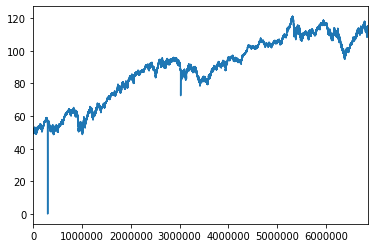

In [36]:
data_ive['price'].plot()

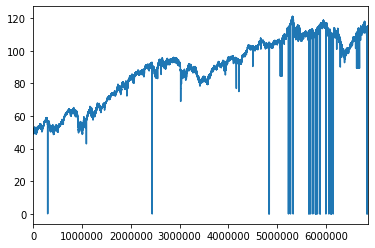

In [41]:
data_ive['bid'].plot()

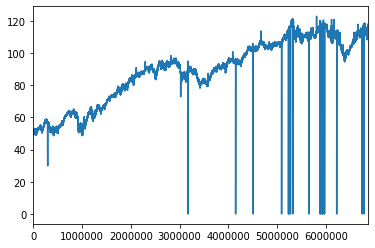

In [42]:
data_ive['ask'].plot()

In [45]:
data_ive_high = data_ive[data_ive['price'] > 30]

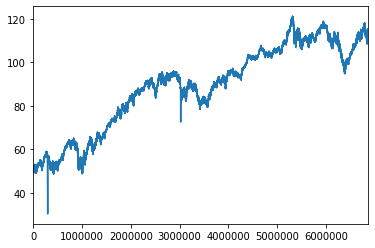

In [47]:
data_ive_high['price'].plot()

In [63]:
data_ive.price.idxmin() #Así preguntas el indice del número menor

Timestamp('2010-05-06 14:49:07')

- Tira las columnas 'bid' y 'ask', y selecciona los datos a partir del 1 de Enero de 2011.

- Calcula las velas diarias, mensuales y anuales del precio (ohlc).

In [66]:
data_ive.price.resample('1D').ohlc().dropna() #Calcula y tira los NaN

,open,high,low,close
2009-09-28,50.79,51.6000,50.7100,51.5400
2009-09-29,51.78,51.9600,51.3700,51.4900
2009-09-30,51.66,51.6900,50.7800,51.2900
2009-10-01,51.16,51.1600,49.7800,50.3166
2009-10-02,49.30,49.8100,49.1900,49.5100
...,...,...,...,...
2019-06-10,113.00,115.1700,113.0000,114.4400
2019-06-11,115.17,115.3351,114.4000,114.6100
2019-06-12,114.52,114.7000,114.0950,114.2100
2019-06-13,114.63,115.0700,114.5569,114.9700


- Define una función que devuelva un dataframe en el que sólo se muestren negociaciones cada 1.000.0000 de euros negociados.

- Calcula los retornos de las velas diarias y cada 1.000.000 de euros negociados.

- Haz un plot de las distribución de los retornos.

- Con los precios muestreados calcula las [bandas de bollinger](https://es.wikipedia.org/wiki/Bandas_de_Bollinger).

- Haz un plot donde muestres las bandas de Bollinger junto con le precio.